# **Initialization**

## **Connecting GDrive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Testing TensorFlow and GPU**

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
2.5.0


## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
np.random.seed(1337)  # for reproducibility
from keras.preprocessing import sequence
from keras.utils import np_utils
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, Embedding, LSTM, SimpleRNN, GRU
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers
from keras.utils.np_utils import to_categorical
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


# **Binary AutoEncoder 5 Layered DNN**

## **Loading Dataset**

In [ ]:
dataset = pd.read_csv("//content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-preprocessed.csv")
dataset = dataset.drop(['Unnamed: 0', 'category'],axis=1)

## **Data Preparation**

In [ ]:
## Separating Dependent(X) and InDependent Variables ##
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]
## Train Test Split for X and Y ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
## Normalizing the X_train ##
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
np.set_printoptions(precision=3)
##Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
np.set_printoptions(precision=3)
##Converting the dataframes to arrays
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

## **Training the AutoEncoder**

In [ ]:
#### Defining Autoencoder ####
#### Defining the AutoEncoder Model ####
# 78 -> 64 -> 32 -> 64 -> 78 #

#### INPUT Layer ####
input_layer = Input(shape=(78,))
#### Encoder Layer - 64 ####
encoded_layer = Dense(64, activation='relu')(input_layer)
#### BottleNeck ####
bottleneck = Dense(32, activation='relu')(encoded_layer)
#### Decoder Layer - 64 ####
decoded_layer = Dense(64, activation='relu')(bottleneck)
#### OutPut Layer ####
output_layer = Dense(78, activation='relu')(decoded_layer)

AutoEncoder = Model(inputs = input_layer, outputs = output_layer)
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 78)                5070      
Total params: 14,318
Trainable params: 14,318
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AutoEncoder.compile(optimizer='rmsprop', loss='mse')

In [ ]:
with tf.device('/device:GPU:0'):
  AutoEncoder_History = AutoEncoder.fit(X_train, X_train, batch_size=64, epochs=30, validation_data=(X_test, X_test))
AutoEncoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerBinary.h5')

Epoch 1/30
40167/40167 [==============================] - 129s 3ms/step - loss: 2.2892e-04 - val_loss: 4.8937e-05
Epoch 2/30
40167/40167 [==============================] - 114s 3ms/step - loss: 4.8599e-05 - val_loss: 4.5334e-05
Epoch 3/30
40167/40167 [==============================] - 115s 3ms/step - loss: 4.7021e-05 - val_loss: 4.6007e-05
Epoch 4/30
40167/40167 [==============================] - 115s 3ms/step - loss: 4.6142e-05 - val_loss: 4.6434e-05
Epoch 5/30
40167/40167 [==============================] - 107s 3ms/step - loss: 4.5771e-05 - val_loss: 4.5182e-05
Epoch 6/30
40167/40167 [==============================] - 116s 3ms/step - loss: 4.5569e-05 - val_loss: 4.6386e-05
Epoch 7/30
40167/40167 [==============================] - 116s 3ms/step - loss: 4.5513e-05 - val_loss: 4.6083e-05
Epoch 8/30
40167/40167 [==============================] - 113s 3ms/step - loss: 4.5147e-05 - val_loss: 4.5009e-05
Epoch 9/30
40167/40167 [==============================] - 107s 3ms/step - loss: 4.5537e-

dict_keys(['loss', 'val_loss'])


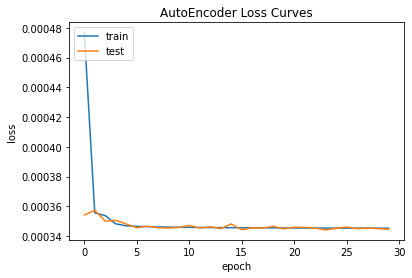

In [ ]:
print(AutoEncoder_History.history.keys())
# # summarize history for accuracy
# plt.plot(AutoEncoder_History.history['accuracy'])
# plt.plot(AutoEncoder_History.history['val_accuracy'])
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()
# summarize history for loss
plt.plot(AutoEncoder_History.history['loss'])
plt.plot(AutoEncoder_History.history['val_loss'])
plt.title('AutoEncoder Loss Curves')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
AutoEncoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerBinaryVersion2.h5')

In [ ]:
AutoEncoder.evaluate(X_test, X_test)

20084/20084 [==============================] - 28s 1ms/step - loss: 1.0847e-05


1.0846559234778397e-05

In [ ]:
encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
encoder.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
Total params: 7,136
Trainable params: 7,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/Encoder5Layer.h5')

In [ ]:
X_train = encoder.predict(X_train)
X_test = encoder.predict(X_test)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(2570676, 32) (642670, 32)
(2570676,) (642670,)


In [ ]:
encoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/Encoder5LayerVersion2.h5')

## **Training the DNN**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(1))
model.add(Activation('sigmoid'))

# try using different optimizers and different optimizer configs
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)

Epoch 1/30
35146/35146 [==============================] - 162s 4ms/step - loss: 0.1647 - accuracy: 0.9400 - val_loss: 0.1384 - val_accuracy: 0.9503
Epoch 2/30
35146/35146 [==============================] - 152s 4ms/step - loss: 0.1322 - accuracy: 0.9531 - val_loss: 0.1247 - val_accuracy: 0.9562
Epoch 3/30
35146/35146 [==============================] - 138s 4ms/step - loss: 0.1275 - accuracy: 0.9549 - val_loss: 0.1247 - val_accuracy: 0.9565
Epoch 4/30
35146/35146 [==============================] - 153s 4ms/step - loss: 0.1257 - accuracy: 0.9555 - val_loss: 0.1262 - val_accuracy: 0.9556
Epoch 5/30
35146/35146 [==============================] - 153s 4ms/step - loss: 0.1242 - accuracy: 0.9562 - val_loss: 0.1224 - val_accuracy: 0.9570
Epoch 6/30
35146/35146 [==============================] - 152s 4ms/step - loss: 0.1231 - accuracy: 0.9564 - val_loss: 0.1199 - val_accuracy: 0.9578
Epoch 7/30
35146/35146 [==============================] - 135s 4ms/step - loss: 0.1224 - accuracy: 0.9568 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


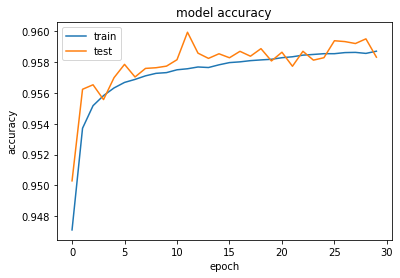

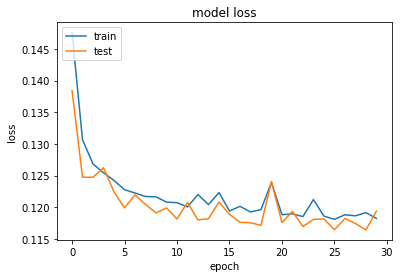

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## **Binary Model Evaluation**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model.evaluate(X_test_encoded, Y_test)

30126/30126 [==============================] - 57s 2ms/step - loss: 0.1194 - accuracy: 0.9583


[0.11937561631202698, 0.9583155512809753]

In [ ]:
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(classification_report(Y_test, Y_predicted))
cm = confusion_matrix(Y_test, Y_predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.89      1.00      0.94    312781
           1       1.00      0.94      0.97    651223

    accuracy                           0.96    964004
   macro avg       0.94      0.97      0.95    964004
weighted avg       0.96      0.96      0.96    964004

[[311591   1190]
 [ 38994 612229]]


# **Multi-Class Classification with AutoEncoder DNN using SMOTE**

## **Loading Dataset**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-multiclass.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)
dataset.shape

(2170743, 79)

## **Data Preparation**

In [ ]:
## Separating the Dependent(X) and Independent(Y) ##
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]
## Splitting the Data into Train and Test Sets ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
## Normalizing the X_train ##
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
## Normalizing the X_test ##
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
## Upsampling the Training Set using SMOTE ##
from imblearn.over_sampling import SMOTE
strategy = {5:10000, 8:10000, 4:10000, 1:10000, 2:10000, 11:10000}
oversample = SMOTE(sampling_strategy = strategy)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
## Converting into Numpy Arrays ##
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
## Converting the Dependent Variable into Categories (Vector of values for each class)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

## **Training the AutoEncoder**

In [ ]:
#### Defining Autoencoder ####
#### Defining the AutoEncoder Model ####
# 78 -> 64 -> 32 -> 64 -> 78 #

#### INPUT Layer ####
input_layer = Input(shape=(78,))
#### Encoder Layer - 64 ####
encoded_layer = Dense(64, activation='relu')(input_layer)
#### BottleNeck ####
bottleneck = Dense(32, activation='relu')(encoded_layer)
#### Decoder Layer - 64 ####
decoded_layer = Dense(64, activation='relu')(bottleneck)
#### OutPut Layer ####
output_layer = Dense(78, activation='relu')(decoded_layer)

AutoEncoder = Model(inputs = input_layer, outputs = output_layer)
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 78)                5070      
Total params: 14,318
Trainable params: 14,318
Non-trainable params: 0
_________________________________________________________________


In [ ]:
AutoEncoder.compile(optimizer='rmsprop', loss='mse')

In [ ]:
with tf.device('/device:GPU:0'):
  AutoEncoder_History = AutoEncoder.fit(X_train, X_train, batch_size=64, epochs=30, validation_data=(X_test, X_test))
AutoEncoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTE.h5')

Epoch 1/30
35820/35820 [==============================] - 95s 3ms/step - loss: 6.9324e-04 - val_loss: 5.3286e-04
Epoch 2/30
35820/35820 [==============================] - 92s 3ms/step - loss: 4.8225e-04 - val_loss: 5.2208e-04
Epoch 3/30
35820/35820 [==============================] - 92s 3ms/step - loss: 4.8102e-04 - val_loss: 5.1644e-04
Epoch 4/30
35820/35820 [==============================] - 92s 3ms/step - loss: 4.8008e-04 - val_loss: 5.1676e-04
Epoch 5/30
35820/35820 [==============================] - 91s 3ms/step - loss: 4.7925e-04 - val_loss: 5.1589e-04
Epoch 6/30
35820/35820 [==============================] - 91s 3ms/step - loss: 4.7873e-04 - val_loss: 5.1557e-04
Epoch 7/30
35820/35820 [==============================] - 90s 3ms/step - loss: 4.6929e-04 - val_loss: 6.8853e-05
Epoch 8/30
35820/35820 [==============================] - 90s 3ms/step - loss: 1.3853e-04 - val_loss: 6.8107e-05
Epoch 9/30
35820/35820 [==============================] - 90s 3ms/step - loss: 1.3804e-04 - val_

dict_keys(['loss', 'val_loss'])


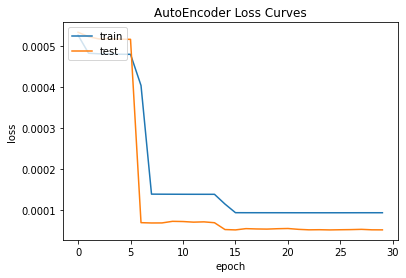

In [ ]:
print(AutoEncoder_History.history.keys())
# summarize history for loss
plt.plot(AutoEncoder_History.history['loss'])
plt.plot(AutoEncoder_History.history['val_loss'])
plt.title('AutoEncoder Loss Curves')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
encoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
Total params: 7,136
Trainable params: 7,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

In [ ]:
print(X_train_encoded.shape, X_test_encoded.shape)
print(Y_train.shape, Y_test.shape)

(2292469, 32) (434149, 32)
(2292469, 13) (434149, 13)


## **Training the DNN**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(13))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=50)
model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredSMOTEDNN5layeredMulticlassSMOTE.h5')

Epoch 1/50
35820/35820 [==============================] - 116s 3ms/step - loss: 0.2034 - accuracy: 0.9134 - val_loss: 0.0966 - val_accuracy: 0.9530
Epoch 2/50
35820/35820 [==============================] - 114s 3ms/step - loss: 0.1261 - accuracy: 0.9411 - val_loss: 0.0993 - val_accuracy: 0.9534
Epoch 3/50
35820/35820 [==============================] - 114s 3ms/step - loss: 0.1181 - accuracy: 0.9442 - val_loss: 0.0989 - val_accuracy: 0.9550
Epoch 4/50
35820/35820 [==============================] - 115s 3ms/step - loss: 0.1141 - accuracy: 0.9455 - val_loss: 0.0977 - val_accuracy: 0.9554
Epoch 5/50
35820/35820 [==============================] - 113s 3ms/step - loss: 0.1133 - accuracy: 0.9460 - val_loss: 0.0955 - val_accuracy: 0.9537
Epoch 6/50
35820/35820 [==============================] - 114s 3ms/step - loss: 0.1132 - accuracy: 0.9460 - val_loss: 0.0930 - val_accuracy: 0.9557
Epoch 7/50
35820/35820 [==============================] - 115s 3ms/step - loss: 0.1116 - accuracy: 0.9463 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


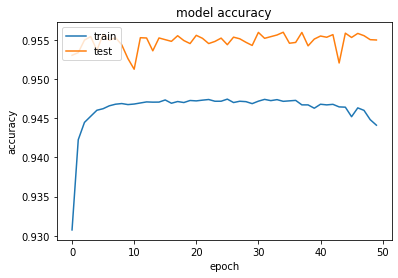

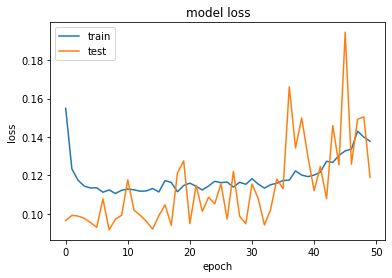

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test_encoded, Y_test)

13568/13568 [==============================] - 28s 2ms/step - loss: 0.1191 - accuracy: 0.9550


[0.11909142881631851, 0.9549670815467834]

# **Multi-Class Classification with AutoEncoder DNN using SMOTE (Higher Samples)**

## **Loading the Dataset**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-multiclass.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)
dataset.shape

## **Data Preparation**

In [ ]:
## Separating the Dependent and Independent Variables ##
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]
## Splitting Data into Train and Test Set ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
##Normalizing the X_train ##
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)
##Normalizing the X_test ##
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
## Upsampling the Classes using SMOTE ##
from imblearn.over_sampling import SMOTE
strategy = {5:100000, 8:100000, 4:100000, 1:200000, 2:200000, 11:200000}
oversample = SMOTE(sampling_strategy = strategy)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)
## Converting into Numpy Array ##
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
## Converting the output variable into Categorical Vectors
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

## **Training the AutoEncoder**

In [ ]:
AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTE.h5')

In [ ]:
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 78)                5070      
Total params: 14,318
Trainable params: 14,318
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
encoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
Total params: 7,136
Trainable params: 7,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

In [ ]:
print(X_train_encoded.shape, X_test_encoded.shape)
print(Y_train.shape, Y_test.shape)

(2592469, 32) (434149, 32)
(2592469, 13) (434149, 13)


## **Training the DNN**

In [ ]:
# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(13))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)
model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredSMOTEDNN5layeredMulticlassSMOTEMORECLASS.h5')

Epoch 1/30
40508/40508 [==============================] - 243s 6ms/step - loss: 0.2214 - accuracy: 0.9058 - val_loss: 0.1039 - val_accuracy: 0.9519
Epoch 2/30
40508/40508 [==============================] - 239s 6ms/step - loss: 0.1442 - accuracy: 0.9332 - val_loss: 0.0967 - val_accuracy: 0.9526
Epoch 3/30
40508/40508 [==============================] - 236s 6ms/step - loss: 0.1381 - accuracy: 0.9354 - val_loss: 0.0989 - val_accuracy: 0.9521
Epoch 4/30
40508/40508 [==============================] - 236s 6ms/step - loss: 0.1338 - accuracy: 0.9367 - val_loss: 0.0954 - val_accuracy: 0.9532
Epoch 5/30
40508/40508 [==============================] - 235s 6ms/step - loss: 0.1364 - accuracy: 0.9374 - val_loss: 0.0996 - val_accuracy: 0.9528
Epoch 6/30
40508/40508 [==============================] - 234s 6ms/step - loss: 0.1387 - accuracy: 0.9379 - val_loss: 0.0918 - val_accuracy: 0.9531
Epoch 7/30
40508/40508 [==============================] - 240s 6ms/step - loss: 0.1327 - accuracy: 0.9379 - val_

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


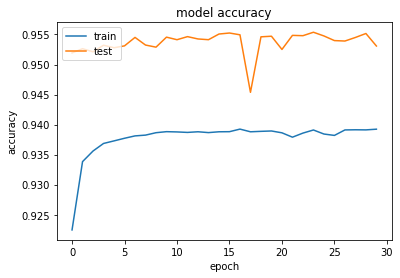

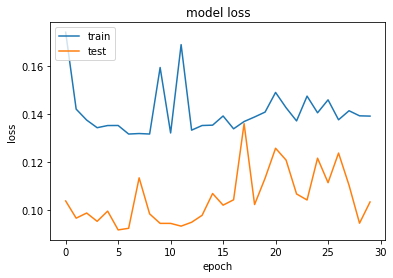

In [ ]:
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Multiclass Model Evaluation**

## **Data Preparation**

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-multiclass.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)
dataset.shape

In [ ]:
dataset['category'].value_counts()

3     686012
6     461912
0     286191
9     193354
12    187589
10    160639
7     139890
5      41508
8      10990
4       1730
1        611
2        230
11        87
Name: category, dtype: int64

In [ ]:
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1736594, 78)
(1736594,)
(434149, 78)
(434149,)


In [ ]:
print(Y_train.value_counts(), Y_test.value_counts())

3     548809
6     369530
0     228953
9     154683
12    150071
10    128511
7     111912
5      33206
8       8792
4       1384
1        489
2        184
11        70
Name: category, dtype: int64 3     137203
6      92382
0      57238
9      38671
12     37518
10     32128
7      27978
5       8302
8       2198
4        346
1        122
2         46
11        17
Name: category, dtype: int64


In [ ]:
print(X_train.shape, Y_train.shape)
print(X_test.shape,Y_test.shape)

(1736594, 78) (1736594,)
(434149, 78) (434149,)


In [ ]:
##Normalizing the X_train
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
##Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)

In [ ]:
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
strategy = {1:2000, 2:2000, 11:2000}
oversample = SMOTE(sampling_strategy = strategy)
X_test, Y_test = oversample.fit_resample(X_test, Y_test)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(1736594, 78) (439964, 78)
(1736594,) (439964,)


In [ ]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [ ]:
print(type(X_train))
print(type(X_test))
print(type(Y_train))
print(type(Y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(Y_train[0])
print(Y_test[0])

(1736594, 78)
(1736594, 13)
(439964, 78)
(439964, 13)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTE.h5')

In [ ]:
AutoEncoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 78)                5070      
Total params: 14,318
Trainable params: 14,318
Non-trainable params: 0
_________________________________________________________________


In [ ]:
encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
encoder.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
Total params: 7,136
Trainable params: 7,136
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

In [ ]:
print(X_train_encoded.shape, X_test_encoded.shape)
print(Y_train.shape, Y_test.shape)

(1736594, 32) (439964, 32)
(1736594, 13) (439964, 13)


## **Evaluating Model with Retrained AutoEncoder**

In [ ]:
model = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredSMOTEDNN5layeredMulticlassSMOTE.h5')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 1024)              33792     
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 768)               787200    
_________________________________________________________________
dropout_1 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               393728    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [ ]:
model.evaluate(X_test_encoded, Y_test)

13749/13749 [==============================] - 43s 3ms/step - loss: 0.1009 - accuracy: 0.9531


[0.10094122588634491, 0.9530848264694214]

In [ ]:
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(Y_predicted.shape)

(439964, 13)


In [ ]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.80      0.70      0.75      2000
           2       0.90      0.92      0.91      2000
           3       1.00      1.00      1.00    137203
           4       1.00      1.00      1.00       346
           5       0.96      1.00      0.98      8302
           6       1.00      1.00      1.00     92382
           7       0.76      0.50      0.60     27978
           8       0.91      1.00      0.95      2198
           9       0.71      0.89      0.79     38671
          10       1.00      0.97      0.98     32128
          11       0.77      0.84      0.81      2000
          12       1.00      1.00      1.00     37518

   micro avg       0.95      0.95      0.95    439964
   macro avg       0.91      0.91      0.90    439964
weighted avg       0.95      0.95      0.95    439964
 samples avg       0.95      0.95      0.95    439964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# cm = confusion_matrix(Y_test, Y_predicted)
# print(cm)

cm = confusion_matrix(Y_test.argmax(axis=1), Y_predicted.argmax(axis=1))
print(cm)

[[ 57215      0      0      0      0      0     13      0      0      0
       9      0      1]
 [    24   1405    138      0      0      1      1      0      1      0
       6    424      0]
 [     9    121   1830      0      0      0      0      0      1      0
       1     38      0]
 [     0      0      8 137192      0      3      0      0      0      0
       0      0      0]
 [     0      1      0      0    345      0      0      0      0      0
       0      0      0]
 [     0      1      0      0      0   8288      1      0     11      0
       0      1      0]
 [    29      0      0      0      0      0  92235      0    114      0
       4      0      0]
 [    15      0      0      0      0      0      0  13907      0  14056
       0      0      0]
 [     0      0      0      0      0      3      4      0   2191      0
       0      0      0]
 [    12      0      0      0      0      0      0   4335      0  34324
       0      0      0]
 [    52    204     54      6      0    

## **Evaluating SMOTE with Retrained AutoEncoder with More Samples**

In [ ]:
model = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredSMOTEDNN5layeredMulticlassSMOTEMORECLASS.h5')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 1024)              33792     
_________________________________________________________________
dropout_15 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 768)               787200    
_________________________________________________________________
dropout_16 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               393728    
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)              

In [ ]:
model.evaluate(X_test_encoded, Y_test)

13749/13749 [==============================] - 43s 3ms/step - loss: 0.1037 - accuracy: 0.9520


[0.10371551662683487, 0.95203697681427]

In [ ]:
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)
print(Y_predicted.shape)

(439964, 13)


In [ ]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.77      0.84      0.80      2000
           2       0.88      0.89      0.89      2000
           3       1.00      1.00      1.00    137203
           4       1.00      1.00      1.00       346
           5       0.95      0.99      0.97      8302
           6       1.00      1.00      1.00     92382
           7       0.73      0.52      0.61     27978
           8       0.92      0.99      0.95      2198
           9       0.71      0.86      0.78     38671
          10       1.00      0.97      0.98     32128
          11       0.76      0.81      0.78      2000
          12       1.00      1.00      1.00     37518

   micro avg       0.95      0.95      0.95    439964
   macro avg       0.90      0.91      0.90    439964
weighted avg       0.95      0.95      0.95    439964
 samples avg       0.95      0.95      0.95    439964



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# cm = confusion_matrix(Y_test, Y_predicted)
# print(cm)

cm = confusion_matrix(Y_test.argmax(axis=1), Y_predicted.argmax(axis=1))
print(cm)

[[ 57215      1      2      0      0      2      8      0      0      0
       9      1      0]
 [    23   1674    109      0      0      0      0      0      0      0
       3    191      0]
 [    16    141   1782      0      0      0      0      0      0      0
       0     61      0]
 [     0      0      5 137198      0      0      0      0      0      0
       0      0      0]
 [     0      0      0      0    346      0      0      0      0      0
       0      0      0]
 [    14      2      0      2      0   8225      2      0     11      0
       1     45      0]
 [    63      0      0      0      0     10  92038      0    132      0
      63     76      0]
 [     0      0      0      0      0      0      0  14647      0  13331
       0      0      0]
 [     2      0      0      0      0      2      0      0   2168      0
       2     24      0]
 [     0      0      0      0      0      0      0   5344      0  33327
       0      0      0]
 [    38    200    118     12      0    

# **Multiclass DNN 8020 Random_state with Same AutoEncoder**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

(2292469, 32) (434149, 32)
(2292469, 13) (434149, 13)
Epoch 1/30
35820/35820 [==============================] - 225s 6ms/step - loss: 0.2122 - accuracy: 0.9098 - val_loss: 0.1169 - val_accuracy: 0.9465
Epoch 2/30
35820/35820 [==============================] - 214s 6ms/step - loss: 0.1348 - accuracy: 0.9390 - val_loss: 0.1173 - val_accuracy: 0.9460
Epoch 3/30
35820/35820 [==============================] - 214s 6ms/step - loss: 0.1277 - accuracy: 0.9416 - val_loss: 0.1048 - val_accuracy: 0.9502
Epoch 4/30
35820/35820 [==============================] - 213s 6ms/step - loss: 0.1257 - accuracy: 0.9427 - val_loss: 0.1157 - val_accuracy: 0.9467
Epoch 5/30
35820/35820 [==============================] - 212s 6ms/step - loss: 0.1241 - accuracy: 0.9436 - val_loss: 0.1174 - val_accuracy: 0.9520
Epoch 6/30
35820/35820 [==============================] - 213s 6ms/step - loss: 0.1267 - accuracy: 0.9438 - val_loss: 0.1074 - val_accuracy: 0.9493
Epoch 7/30
35820/35820 [==============================] - 

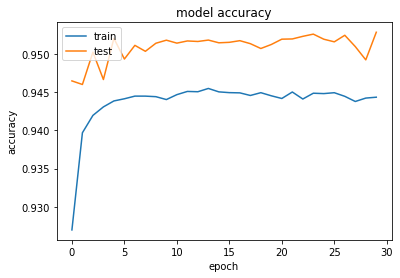

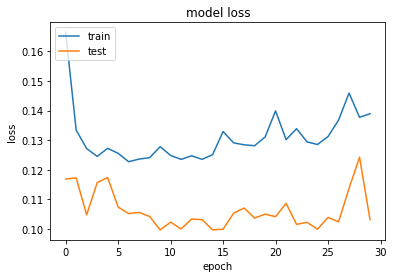

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(439964, 78) (439964,)
(439964, 32) (439964, 13)
13749/13749 [==============================] - 44s 3ms/step - loss: 0.1229 - accuracy: 0.9505


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.74      0.76      0.75      2000
           2       0.80      0.89      0.84      2000
           3       1.00      1.00      1.00    137203
           4       0.99      1.00      1.00       346
           5       0.94      1.00      0.97      8302
           6       1.00      0.99      0.99     92382
           7       0.76      0.52      0.61     27978
           8       0.79      0.99      0.88      2198
           9       0.72      0.88      0.79     38671
          10       1.00      0.95      0.97     32128
          11       0.76      0.66      0.71      2000
          12       0.99      1.00      1.00     37518

   micro avg       0.95      0.95      0.95    439964
   macro avg       0.88      0.89      0.89    439964
weighted avg       0.95      0.95      0.95    439964
 samples avg       0.95      0.95      0.95    439964

[[ 57222      0      0   

In [ ]:
## Loading the Dataset
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-multiclass.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)

## Separating the Dependent(X) and Independent(Y) ##
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

## Splitting the Data into Train and Test Sets ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Normalizing the X_train ##
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)

## Normalizing the X_test ##
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)

## Upsampling the Training Set using SMOTE ##
from imblearn.over_sampling import SMOTE
strategy = {5:100000, 8:100000, 4:100000, 1:100000, 2:100000, 11:100000}
oversample = SMOTE(sampling_strategy = strategy)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

## Converting into Numpy Arrays ##
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

## Converting the Dependent Variable into Categories (Vector of values for each class)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# #### Defining Autoencoder ####
# #### Defining the AutoEncoder Model ####
# # 78 -> 64 -> 32 -> 64 -> 78 #

# #### INPUT Layer ####
# input_layer = Input(shape=(78,))
# #### Encoder Layer - 64 ####
# encoded_layer = Dense(64, activation='relu')(input_layer)
# #### BottleNeck ####
# bottleneck = Dense(32, activation='relu')(encoded_layer)
# #### Decoder Layer - 64 ####
# decoded_layer = Dense(64, activation='relu')(bottleneck)
# #### OutPut Layer ####
# output_layer = Dense(78, activation='relu')(decoded_layer)

# AutoEncoder = Model(inputs = input_layer, outputs = output_layer)
# AutoEncoder.summary()
# AutoEncoder.compile(optimizer='rmsprop', loss='mse')
# with tf.device('/device:GPU:0'):
#   AutoEncoder_History = AutoEncoder.fit(X_train, X_train, batch_size=64, epochs=30, validation_data=(X_test, X_test))
# AutoEncoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')

# print(AutoEncoder_History.history.keys())
# # summarize history for loss
# plt.plot(AutoEncoder_History.history['loss'])
# plt.plot(AutoEncoder_History.history['val_loss'])
# plt.title('AutoEncoder Loss Curves')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')

encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
# encoder.summary()

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

print(X_train_encoded.shape, X_test_encoded.shape)
print(Y_train.shape, Y_test.shape)

# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(13))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)
model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredSMOTEDNN5layeredMulticlassDNNSMOTEUpdatedNew.h5')

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Generating Predictions

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
## Converting to Numpy Arrays
Y_test = np.array(Y_test)

## SMOTE for Test Samples
from imblearn.over_sampling import SMOTE
strategy = {1:2000, 2:2000, 11:2000}
oversample = SMOTE(sampling_strategy = strategy)
X_test, Y_test = oversample.fit_resample(X_test, Y_test)
print(X_test.shape, Y_test.shape)
Y_test = np.array(Y_test)

## Converting Output Labels to Sparse Format
Y_test = to_categorical(Y_test)

# ## Loading the AutoEncoder for Compressing Test Data
# AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')
# AutoEncoder.evaluate(X_test, X_test)

# ## Extracting the Encoder Module
# encoder = Sequential()
# encoder.add(AutoEncoder.layers[0])
# encoder.add(AutoEncoder.layers[1])
# encoder.add(AutoEncoder.layers[2])

## Encoding the Testing Data
X_test_encoded = encoder.predict(X_test)
print(X_test_encoded.shape, Y_test.shape)
## Evaluating Model
model.evaluate(X_test_encoded, Y_test)

## Generating Predictions
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)

## Generating Classification Report on the Predicted vs Actual Value
print(classification_report(Y_test, Y_predicted))

## Generating the Confusion Matrix
cm = confusion_matrix(Y_test.argmax(axis=1), Y_predicted.argmax(axis=1))
print(cm)

# **Multiclass DNN 8020 Random State with Retrained AutoEncoder**

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 78)]              0         
_________________________________________________________________
dense (Dense)                (None, 64)                5056      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_3 (Dense)              (None, 78)                5070      
Total params: 14,318
Trainable params: 14,318
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
35820/35820 [==============================] - 108s 3ms/step - loss: 0.0022 - val_loss: 6.7292e-05
Epoch 2/15
35

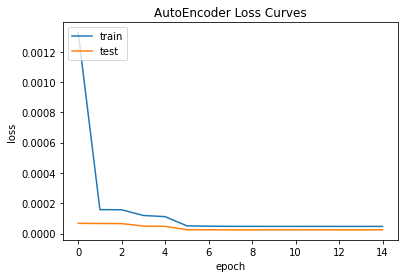

(2292469, 32) (434149, 32)
(2292469, 13) (434149, 13)
Epoch 1/30
35820/35820 [==============================] - 133s 4ms/step - loss: 0.2219 - accuracy: 0.9053 - val_loss: 0.1413 - val_accuracy: 0.9325
Epoch 2/30
35820/35820 [==============================] - 124s 3ms/step - loss: 0.1483 - accuracy: 0.9337 - val_loss: 0.1069 - val_accuracy: 0.9494
Epoch 3/30
35820/35820 [==============================] - 123s 3ms/step - loss: 0.1397 - accuracy: 0.9370 - val_loss: 0.1137 - val_accuracy: 0.9451
Epoch 4/30
35820/35820 [==============================] - 129s 4ms/step - loss: 0.1337 - accuracy: 0.9393 - val_loss: 0.1026 - val_accuracy: 0.9514
Epoch 5/30
35820/35820 [==============================] - 123s 3ms/step - loss: 0.1317 - accuracy: 0.9405 - val_loss: 0.1117 - val_accuracy: 0.9477
Epoch 6/30
35820/35820 [==============================] - 124s 3ms/step - loss: 0.1302 - accuracy: 0.9413 - val_loss: 0.1030 - val_accuracy: 0.9512
Epoch 7/30
35820/35820 [==============================] - 

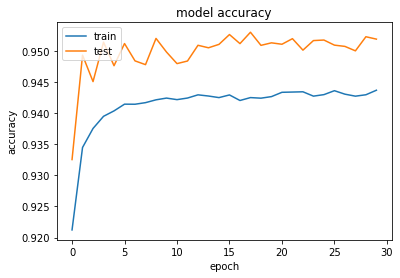

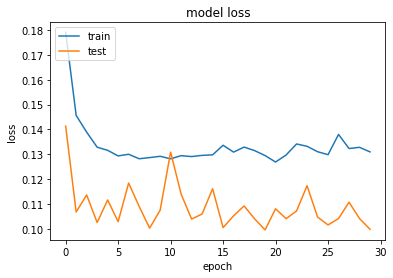

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(439964, 78) (439964,)
(439964, 32) (439964, 13)
13749/13749 [==============================] - 31s 2ms/step - loss: 0.1118 - accuracy: 0.9490


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57238
           1       0.61      0.65      0.63      2000
           2       0.86      0.79      0.82      2000
           3       1.00      1.00      1.00    137203
           4       1.00      1.00      1.00       346
           5       0.92      1.00      0.95      8302
           6       1.00      0.99      1.00     92382
           7       0.74      0.53      0.61     27978
           8       0.89      0.99      0.93      2198
           9       0.72      0.86      0.78     38671
          10       1.00      0.94      0.97     32128
          11       0.69      0.71      0.70      2000
          12       0.98      1.00      0.99     37518

   micro avg       0.95      0.95      0.95    439964
   macro avg       0.88      0.88      0.88    439964
weighted avg       0.95      0.95      0.95    439964
 samples avg       0.95      0.95      0.95    439964

[[ 57211      1      0   

In [ ]:
## Loading the Dataset
dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-multiclass.csv")
dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)

## Separating the Dependent(X) and Independent(Y) ##
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

## Splitting the Data into Train and Test Sets ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Normalizing the X_train ##
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)

## Normalizing the X_test ##
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)

## Upsampling the Training Set using SMOTE ##
from imblearn.over_sampling import SMOTE
strategy = {5:100000, 8:100000, 4:100000, 1:100000, 2:100000, 11:100000}
oversample = SMOTE(sampling_strategy = strategy)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

## Converting into Numpy Arrays ##
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

## Converting the Dependent Variable into Categories (Vector of values for each class)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

#### Defining Autoencoder ####
#### Defining the AutoEncoder Model ####
# 78 -> 64 -> 32 -> 64 -> 78 #

#### INPUT Layer ####
input_layer = Input(shape=(78,))
#### Encoder Layer - 64 ####
encoded_layer = Dense(64, activation='relu')(input_layer)
#### BottleNeck ####
bottleneck = Dense(32, activation='relu')(encoded_layer)
#### Decoder Layer - 64 ####
decoded_layer = Dense(64, activation='relu')(bottleneck)
#### OutPut Layer ####
output_layer = Dense(78, activation='relu')(decoded_layer)

AutoEncoder = Model(inputs = input_layer, outputs = output_layer)
AutoEncoder.summary()
AutoEncoder.compile(optimizer='rmsprop', loss='mse')
with tf.device('/device:GPU:0'):
  AutoEncoder_History = AutoEncoder.fit(X_train, X_train, batch_size=64, epochs=15, validation_data=(X_test, X_test))
# AutoEncoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')

print(AutoEncoder_History.history.keys())
# summarize history for loss
plt.plot(AutoEncoder_History.history['loss'])
plt.plot(AutoEncoder_History.history['val_loss'])
plt.title('AutoEncoder Loss Curves')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

encoder = Sequential()
encoder.add(AutoEncoder.layers[0])
encoder.add(AutoEncoder.layers[1])
encoder.add(AutoEncoder.layers[2])
# encoder.summary()

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

print(X_train_encoded.shape, X_test_encoded.shape)
print(Y_train.shape, Y_test.shape)

# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(13))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)
# model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredSMOTEDNN5layeredMulticlassSMOTEUpdatedNew.h5')

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Generating Predictions

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)

## Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
## Converting to Numpy Arrays
Y_test = np.array(Y_test)

## SMOTE for Test Samples
from imblearn.over_sampling import SMOTE
strategy = {1:2000, 2:2000, 11:2000}
oversample = SMOTE(sampling_strategy = strategy)
X_test, Y_test = oversample.fit_resample(X_test, Y_test)
print(X_test.shape, Y_test.shape)
Y_test = np.array(Y_test)

## Converting Output Labels to Sparse Format
Y_test = to_categorical(Y_test)

# ## Loading the AutoEncoder for Compressing Test Data
# AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')
# AutoEncoder.evaluate(X_test, X_test)

# ## Extracting the Encoder Module
# encoder = Sequential()
# encoder.add(AutoEncoder.layers[0])
# encoder.add(AutoEncoder.layers[1])
# encoder.add(AutoEncoder.layers[2])

## Encoding the Testing Data
X_test_encoded = encoder.predict(X_test)
print(X_test_encoded.shape, Y_test.shape)
## Evaluating Model
model.evaluate(X_test_encoded, Y_test)

## Generating Predictions
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)

## Generating Classification Report on the Predicted vs Actual Value
print(classification_report(Y_test, Y_predicted))

## Generating the Confusion Matrix
cm = confusion_matrix(Y_test.argmax(axis=1), Y_predicted.argmax(axis=1))
print(cm)

# **Multiclass DNN 7030 Random State**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

(2080910, 32) (651223, 32)
(2080910, 13) (651223, 13)
Epoch 1/30
32515/32515 [==============================] - 147s 4ms/step - loss: 0.2298 - accuracy: 0.9018 - val_loss: 0.1311 - val_accuracy: 0.9406
Epoch 2/30
32515/32515 [==============================] - 141s 4ms/step - loss: 0.1491 - accuracy: 0.9327 - val_loss: 0.1082 - val_accuracy: 0.9496
Epoch 3/30
32515/32515 [==============================] - 141s 4ms/step - loss: 0.1386 - accuracy: 0.9373 - val_loss: 0.1080 - val_accuracy: 0.9496
Epoch 4/30
32515/32515 [==============================] - 121s 4ms/step - loss: 0.1348 - accuracy: 0.9397 - val_loss: 0.1150 - val_accuracy: 0.9479
Epoch 5/30
32515/32515 [==============================] - 121s 4ms/step - loss: 0.1312 - accuracy: 0.9413 - val_loss: 0.1095 - val_accuracy: 0.9465
Epoch 6/30
32515/32515 [==============================] - 142s 4ms/step - loss: 0.1310 - accuracy: 0.9412 - val_loss: 0.1105 - val_accuracy: 0.9520
Epoch 7/30
32515/32515 [==============================] - 

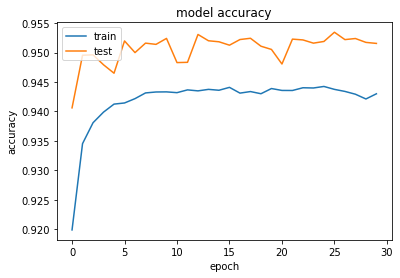

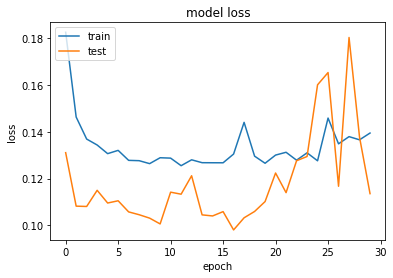

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(656945, 78) (656945,)
(656945, 32) (656945, 13)
20530/20530 [==============================] - 45s 2ms/step - loss: 0.1435 - accuracy: 0.9500


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85857
           1       0.67      0.73      0.70      2000
           2       0.92      0.80      0.85      2000
           3       1.00      1.00      1.00    205804
           4       1.00      1.00      1.00       519
           5       0.94      1.00      0.97     12452
           6       1.00      1.00      1.00    138574
           7       0.77      0.50      0.61     41967
           8       0.83      0.99      0.90      3297
           9       0.71      0.89      0.79     58006
          10       1.00      0.93      0.96     48192
          11       0.65      0.73      0.69      2000
          12       0.97      1.00      0.99     56277

   micro avg       0.95      0.95      0.95    656945
   macro avg       0.88      0.89      0.88    656945
weighted avg       0.95      0.95      0.95    656945
 samples avg       0.95      0.95      0.95    656945

[[ 85829      1      0   

In [ ]:
# ## Loading the Dataset
# dataset = pd.read_csv("/content/drive/MyDrive/M.Tech Project/Dataset and Codes/CIC IDS 2018/cic-ids-2018-multiclass.csv")
# dataset = dataset.drop(['Unnamed: 0', 'label'],axis=1)

## Separating the Dependent(X) and Independent(Y) ##
X = dataset.iloc[:, :-1]
Y = dataset.iloc[:,-1]

## Splitting the Data into Train and Test Sets ##
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

## Normalizing the X_train ##
scaler = Normalizer().fit(X_train)
X_train = scaler.transform(X_train)

## Normalizing the X_test ##
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)

## Upsampling the Training Set using SMOTE ##
from imblearn.over_sampling import SMOTE
strategy = {5:100000, 8:100000, 4:100000, 1:100000, 2:100000, 11:100000}
oversample = SMOTE(sampling_strategy = strategy)
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

## Converting into Numpy Arrays ##
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)

## Converting the Dependent Variable into Categories (Vector of values for each class)
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

# #### Defining Autoencoder ####
# #### Defining the AutoEncoder Model ####
# # 78 -> 64 -> 32 -> 64 -> 78 #

# #### INPUT Layer ####
# input_layer = Input(shape=(78,))
# #### Encoder Layer - 64 ####
# encoded_layer = Dense(64, activation='relu')(input_layer)
# #### BottleNeck ####
# bottleneck = Dense(32, activation='relu')(encoded_layer)
# #### Decoder Layer - 64 ####
# decoded_layer = Dense(64, activation='relu')(bottleneck)
# #### OutPut Layer ####
# output_layer = Dense(78, activation='relu')(decoded_layer)

# AutoEncoder = Model(inputs = input_layer, outputs = output_layer)
# AutoEncoder.summary()
# AutoEncoder.compile(optimizer='rmsprop', loss='mse')
# with tf.device('/device:GPU:0'):
#   AutoEncoder_History = AutoEncoder.fit(X_train, X_train, batch_size=64, epochs=15, validation_data=(X_test, X_test))
# # AutoEncoder.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')

# print(AutoEncoder_History.history.keys())
# # summarize history for loss
# plt.plot(AutoEncoder_History.history['loss'])
# plt.plot(AutoEncoder_History.history['val_loss'])
# plt.title('AutoEncoder Loss Curves')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'test'], loc='upper left')
# plt.show()

# encoder = Sequential()
# encoder.add(AutoEncoder.layers[0])
# encoder.add(AutoEncoder.layers[1])
# encoder.add(AutoEncoder.layers[2])
# encoder.summary()

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

print(X_train_encoded.shape, X_test_encoded.shape)
print(Y_train.shape, Y_test.shape)

# 1. define the network
model = Sequential()
model.add(Dense(1024,input_dim=32,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(768,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(512,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(256,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(128,activation='relu'))  
model.add(Dropout(0.01))
model.add(Dense(13))
model.add(Activation('softmax'))

# try using different optimizers and different optimizer configs
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
with tf.device('/device:GPU:0'):
  model_history = model.fit(X_train_encoded, Y_train, validation_data=(X_test_encoded, Y_test), batch_size=64, epochs=30)
# model.save('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayeredSMOTEDNN5layeredMulticlassSMOTEUpdatedNew.h5')

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Generating Predictions

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

## Normalizing the X_test
scaler = Normalizer().fit(X_test)
X_test = scaler.transform(X_test)
## Converting to Numpy Arrays
Y_test = np.array(Y_test)

## SMOTE for Test Samples
from imblearn.over_sampling import SMOTE
strategy = {1:2000, 2:2000, 11:2000}
oversample = SMOTE(sampling_strategy = strategy)
X_test, Y_test = oversample.fit_resample(X_test, Y_test)
print(X_test.shape, Y_test.shape)
Y_test = np.array(Y_test)

## Converting Output Labels to Sparse Format
Y_test = to_categorical(Y_test)

# ## Loading the AutoEncoder for Compressing Test Data
# AutoEncoder = load_model('/content/drive/MyDrive/M.Tech Project/Dataset and Codes/Saved Models/AutoEncoder5LayerSMOTEUpdated.h5')
# AutoEncoder.evaluate(X_test, X_test)

# ## Extracting the Encoder Module
# encoder = Sequential()
# encoder.add(AutoEncoder.layers[0])
# encoder.add(AutoEncoder.layers[1])
# encoder.add(AutoEncoder.layers[2])

## Encoding the Testing Data
X_test_encoded = encoder.predict(X_test)
print(X_test_encoded.shape, Y_test.shape)
## Evaluating Model
model.evaluate(X_test_encoded, Y_test)

## Generating Predictions
Y_predicted = np.round(model.predict(X_test_encoded))
Y_predicted = np.reshape(Y_predicted, Y_test.shape)

## Generating Classification Report on the Predicted vs Actual Value
print(classification_report(Y_test, Y_predicted))

## Generating the Confusion Matrix
cm = confusion_matrix(Y_test.argmax(axis=1), Y_predicted.argmax(axis=1))
print(cm)